In [27]:
import matplotlib
matplotlib.use('TkAgg')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import folium
import geopandas as gpd

from folium.plugins import MiniMap
sns.set()
%matplotlib inline
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

# Bogotá

In [28]:
datos = pd.read_excel('datos_shape.xlsx')
df = pd.DataFrame(datos,index=None)
df= df.iloc[:,1:]
df

,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,Latitud,Longitud,Segment,Comp 1,Comp 2,Comp 3
0,382.0,390.0,20,1,1,0,APA,Bogota,4.751552,-74.057260,First,-2.739759,0.871841,0.614375
1,219.0,210.0,24,2,2,1,CAS,Bogota,4.583446,-74.155975,Four,-0.956207,-0.694414,1.113272
2,491.0,490.0,25,2,3,1,APA,Bogota,6.243953,-75.585450,Third,-0.446717,1.881415,0.449322
3,487.0,490.0,25,1,2,0,CAS,Medellin,4.732983,-74.038522,First,-2.159135,1.829734,-0.028844
4,130.0,125.0,25,1,1,1,APA,Bogota,4.559000,-74.112000,five,-2.146397,-1.510678,1.743902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,528.0,520.0,300,2,3,0,CAS,Bogota,4.857631,-74.055267,Third,1.844591,2.243483,-1.065674
6390,515.0,520.0,300,2,3,1,CAS,Bogota,4.721863,-74.036420,Third,2.342865,2.211183,0.032566
6391,564.0,560.0,300,2,3,0,APA,Medellin,6.179854,-75.586581,Third,1.837914,2.598095,-1.071523
6392,675.0,668.0,300,2,3,0,CAS,Medellin,4.868760,-74.061080,Third,1.818665,3.619895,-1.088453


In [29]:
df2=gpd.read_file('C:/Users/TRUDATA/Documents/MGN2021_MPIO_POLITICO (1)/MGN_MPIO_POLITICO.shp')
df2

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97,889,97889,VAUPÉS,YAVARATÉ,Decreto Nacional 1510 del 29 de Diciembre de 1914,4660.405650,4,2021,ÁREA NO MUNICIPALIZADA,3.970046,0.376344,"POLYGON ((-69.70210 1.10907, -69.70233 1.10833..."
1117,99,624,99624,VICHADA,SANTA ROSALÍA,Ordenanza 19 de Noviembre 26 de 1993,3691.869178,4,2021,MUNICIPIO,3.805847,0.299960,"POLYGON ((-70.65378 5.37298, -70.65327 5.37298..."
1118,99,001,99001,VICHADA,PUERTO CARREÑO,Decreto 1594 de Ago 5 de 1974,12204.913204,4,2021,MUNICIPIO,5.475145,0.985914,"POLYGON ((-67.80892 6.32430, -67.80892 6.32430..."
1119,99,524,99524,VICHADA,LA PRIMAVERA,Decreto 676 de Abril13 de 1987,18569.337654,4,2021,MUNICIPIO,8.080061,1.506224,"POLYGON ((-69.03359 6.21870, -69.03334 6.21858..."


In [30]:
#df2 = df2[df2['MPIO_CDPMP'] == '05001']
df2 = df2[df2['MPIO_CDPMP'] == '11001']

In [31]:
df = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df.Longitud, df.Latitud))
df.crs = "EPSG:4326"
df["coordenadas"] = df["geometry"].apply(lambda x: x.representative_point().coords[:][0])
df

,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,Latitud,Longitud,Segment,Comp 1,Comp 2,Comp 3,geometry,coordenadas
0,382.0,390.0,20,1,1,0,APA,Bogota,4.751552,-74.057260,First,-2.739759,0.871841,0.614375,POINT (-74.05726 4.75155),"(-74.05725996, 4.75155221)"
1,219.0,210.0,24,2,2,1,CAS,Bogota,4.583446,-74.155975,Four,-0.956207,-0.694414,1.113272,POINT (-74.15598 4.58345),"(-74.155975341797, 4.5834460258484)"
2,491.0,490.0,25,2,3,1,APA,Bogota,6.243953,-75.585450,Third,-0.446717,1.881415,0.449322,POINT (-75.58545 6.24395),"(-75.58545, 6.2439528)"
3,487.0,490.0,25,1,2,0,CAS,Medellin,4.732983,-74.038522,First,-2.159135,1.829734,-0.028844,POINT (-74.03852 4.73298),"(-74.038522345739, 4.7329831903933)"
4,130.0,125.0,25,1,1,1,APA,Bogota,4.559000,-74.112000,five,-2.146397,-1.510678,1.743902,POINT (-74.11200 4.55900),"(-74.111999511719, 4.5590000152588)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,528.0,520.0,300,2,3,0,CAS,Bogota,4.857631,-74.055267,Third,1.844591,2.243483,-1.065674,POINT (-74.05527 4.85763),"(-74.055267333984, 4.8576312065125)"
6390,515.0,520.0,300,2,3,1,CAS,Bogota,4.721863,-74.036420,Third,2.342865,2.211183,0.032566,POINT (-74.03642 4.72186),"(-74.03642, 4.721863)"
6391,564.0,560.0,300,2,3,0,APA,Medellin,6.179854,-75.586581,Third,1.837914,2.598095,-1.071523,POINT (-75.58658 6.17985),"(-75.586581230164, 6.1798535721365)"
6392,675.0,668.0,300,2,3,0,CAS,Medellin,4.868760,-74.061080,Third,1.818665,3.619895,-1.088453,POINT (-74.06108 4.86876),"(-74.061080472327, 4.8687603369878)"


In [34]:
df3=df[df['City'] == 'Bogota']
df3=df3[df3['Longitud']>=-74.50]
df3=df3[df3['Latitud']<=4.8]
df_c1=df3[df3['Segment'] == 'First']
df_c2=df3[df3['Segment'] == 'Second']
df_c3=df3[df3['Segment'] == 'Third']
df_c4=df3[df3['Segment'] == 'Four']
df_c5=df3[df3['Segment'] == 'five']

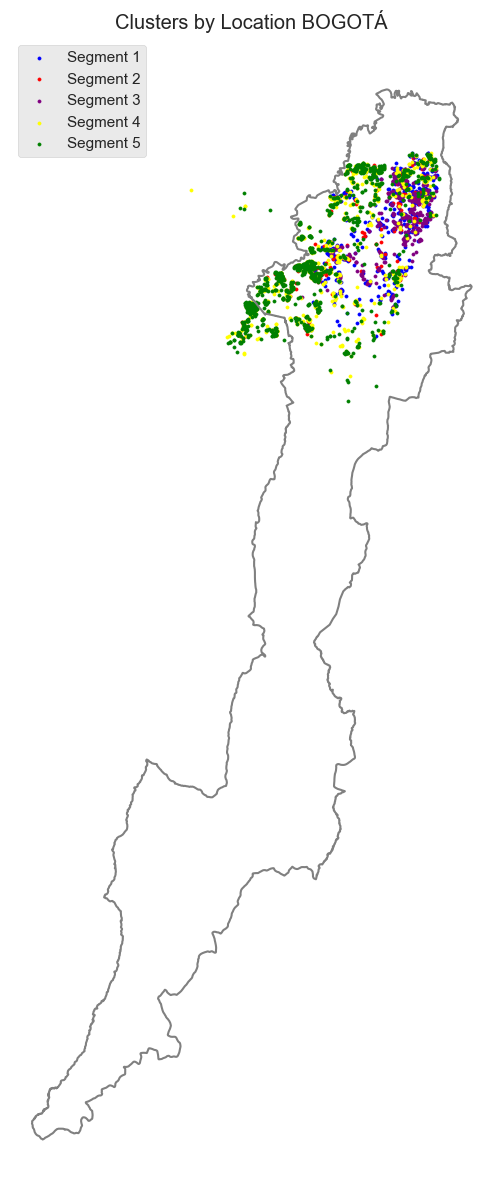

In [35]:
fig2, ax = plt.subplots(figsize = (10, 15), dpi = 100)
df2.boundary.plot(ax = ax,color='gray')
df_c1['geometry'].plot(ax=ax,markersize=5,color='Blue',label='Segment 1')
df_c2['geometry'].plot(ax=ax,markersize=5,color='red',label='Segment 2')
df_c3['geometry'].plot(ax=ax,markersize=5,color='purple',label='Segment 3')
df_c4['geometry'].plot(ax=ax,markersize=5,color='yellow',label='Segment 4')
df_c5['geometry'].plot(ax=ax,markersize=5,color='Green',label='Segment 5')
plt.title('Clusters by Location BOGOTÁ')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:5], labels[0:5])
ax.set_axis_off()

In [36]:
df3

,finalACMPrice,originalPrice,area,bathrooms,rooms,garages,type,City,Latitud,Longitud,Segment,Comp 1,Comp 2,Comp 3,geometry,coordenadas
0,382.0,390.0,20,1,1,0,APA,Bogota,4.751552,-74.057260,First,-2.739759,0.871841,0.614375,POINT (-74.05726 4.75155),"(-74.05725996, 4.75155221)"
1,219.0,210.0,24,2,2,1,CAS,Bogota,4.583446,-74.155975,Four,-0.956207,-0.694414,1.113272,POINT (-74.15598 4.58345),"(-74.155975341797, 4.5834460258484)"
4,130.0,125.0,25,1,1,1,APA,Bogota,4.559000,-74.112000,five,-2.146397,-1.510678,1.743902,POINT (-74.11200 4.55900),"(-74.111999511719, 4.5590000152588)"
5,144.0,140.0,25,1,1,0,APA,Bogota,4.714621,-74.135200,five,-2.646070,-1.403686,0.644501,POINT (-74.13520 4.71462),"(-74.1352, 4.7146206)"
7,210.0,200.0,25,1,1,0,APA,Bogota,4.639863,-74.155998,five,-2.657147,-0.815812,0.634737,POINT (-74.15600 4.63986),"(-74.15599822998, 4.6398630142212)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,331.0,330.0,300,2,3,0,CAS,Bogota,4.741057,-74.059204,Second,1.878607,0.437840,-1.035746,POINT (-74.05920 4.74106),"(-74.059204101562, 4.7410569190979)"
6385,389.0,390.0,300,2,3,1,CAS,Bogota,4.723866,-74.130740,Second,2.365363,1.016728,0.052317,POINT (-74.13074 4.72387),"(-74.13074, 4.7238665)"
6387,425.0,430.0,300,2,3,1,CAS,Bogota,4.673953,-74.086990,Second,2.358685,1.371340,0.046468,POINT (-74.08699 4.67395),"(-74.086990356445, 4.6739530563354)"
6390,515.0,520.0,300,2,3,1,CAS,Bogota,4.721863,-74.036420,Third,2.342865,2.211183,0.032566,POINT (-74.03642 4.72186),"(-74.03642, 4.721863)"


# Medellín

In [37]:
df_22=gpd.read_file('C:/Users/TRUDATA/Documents/MGN2021_MPIO_POLITICO (1)/MGN_MPIO_POLITICO.shp')
df_22

,DPTO_CCDGO,MPIO_CCDGO,MPIO_CDPMP,DPTO_CNMBR,MPIO_CNMBR,MPIO_CRSLC,MPIO_NAREA,MPIO_CSMBL,MPIO_VGNC,MPIO_TIPO,Shape_Leng,Shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,374.812877,4,2021,MUNICIPIO,1.032546,0.030606,"POLYGON ((-75.66974 6.37360, -75.66965 6.37360..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,507.141095,4,2021,MUNICIPIO,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,296.894050,4,2021,MUNICIPIO,0.812183,0.024248,"POLYGON ((-76.08351 6.75050, -76.08325 6.75048..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,128.932153,4,2021,MUNICIPIO,0.705200,0.010535,"POLYGON ((-75.03320 6.41586, -75.03313 6.41585..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,84.132675,4,2021,MUNICIPIO,0.445241,0.006867,"POLYGON ((-75.67587 6.08561, -75.67540 6.08491..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116,97,889,97889,VAUPÉS,YAVARATÉ,Decreto Nacional 1510 del 29 de Diciembre de 1914,4660.405650,4,2021,ÁREA NO MUNICIPALIZADA,3.970046,0.376344,"POLYGON ((-69.70210 1.10907, -69.70233 1.10833..."
1117,99,624,99624,VICHADA,SANTA ROSALÍA,Ordenanza 19 de Noviembre 26 de 1993,3691.869178,4,2021,MUNICIPIO,3.805847,0.299960,"POLYGON ((-70.65378 5.37298, -70.65327 5.37298..."
1118,99,001,99001,VICHADA,PUERTO CARREÑO,Decreto 1594 de Ago 5 de 1974,12204.913204,4,2021,MUNICIPIO,5.475145,0.985914,"POLYGON ((-67.80892 6.32430, -67.80892 6.32430..."
1119,99,524,99524,VICHADA,LA PRIMAVERA,Decreto 676 de Abril13 de 1987,18569.337654,4,2021,MUNICIPIO,8.080061,1.506224,"POLYGON ((-69.03359 6.21870, -69.03334 6.21858..."


In [38]:
df_22=df_22[df_22.MPIO_CDPMP.isin(['05001', '05079','05088','05129','05266','05308','05212','05360','05380','05631'])]

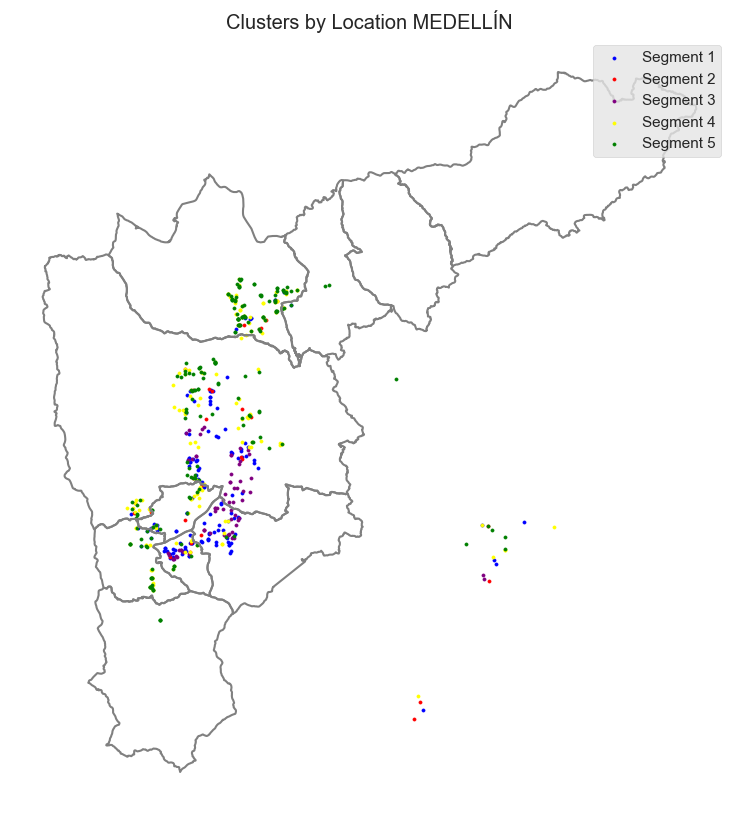

In [39]:
df3 = df[df['City'] == 'Medellin']
#df3 = df3[df3['Longitud'] <= -75.25]
df3 = df3[df3['Latitud'] >= 6]
df_c1 = df3[df3['Segment'] == 'First']
df_c2 = df3[df3['Segment'] == 'Second']
df_c3 = df3[df3['Segment'] == 'Third']
df_c4 = df3[df3['Segment'] == 'Four']
df_c5 = df3[df3['Segment'] == 'five']
fig2, ax = plt.subplots(figsize=(12, 10), dpi=100)
df_22.boundary.plot(ax=ax, color='gray')
df_c1['geometry'].plot(ax=ax, markersize=5, color='Blue', label='Segment 1')
df_c2['geometry'].plot(ax=ax, markersize=5, color='red', label='Segment 2')
df_c3['geometry'].plot(ax=ax, markersize=5, color='purple', label='Segment 3')
df_c4['geometry'].plot(ax=ax, markersize=5, color='yellow', label='Segment 4')
df_c5['geometry'].plot(ax=ax, markersize=5, color='Green', label='Segment 5')
plt.title('Clusters by Location MEDELLÍN')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[0:5], labels[0:5])
ax.set_axis_off()